In [93]:
import numpy as np
import pandas as pd

In [94]:
from tensorflow.keras.layers import Dense,LSTM,RNN,Dropout

In [95]:
from tensorflow.keras import Sequential

In [96]:
df = pd.read_csv("train.csv")

In [97]:
df

,Unnamed: 0,TEXT,Label
0,0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,2,Been friends since 7th grade. Look at us now w...,2
3,3,This is what it looks like when someone loves ...,3
4,4,RT @user this white family was invited to a Bl...,3
...,...,...,...
69995,69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,69997,If one of my daughters is wearing this and ask...,2
69998,69998,Guess who whoop people on THEIR homecoming?! #...,3


## Preproccessing

In [98]:
df.info()
# => no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  70000 non-null  int64 
 1   TEXT        70000 non-null  object
 2   Label       70000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


In [99]:
df['TEXT'][0]

'Vacation wasted ! #vacation2017 #photobomb #tired #vacationwasted #mcgar30 #miami @ Port of…\n'

In [100]:
# unnecessary = ["@", "#", "\\"]
necessary = [".", ",", "!", "?"]
def r_unnecessary1(line):
    nline = ""
    line = line.split()
#     line = ['sejbsgr','sejgbsr','akbrgogir']
#     words = 'sejbsgr'
    for words in line:
        c = 0
        if(words[0] in necessary):
            c = 1
        elif(words[(len(words)-1)] in necessary):
            c = 2
        if(c == 1):
            nline += words[0] + " " + words[1:len(words)] + " "
        if(c == 2):
            nline += words[0:(len(words) - 1)] + " " + words[(len(words) - 1)] + " "
        if(c == 0):
            nline += words + " "
    return nline

In [101]:
r_unnecessary1("okay, guys, how are we feeling today .I am good !!!!!!!!")

'okay , guys , how are we feeling today . I am good ! !!!!!!! '

In [102]:
# unnecessary = ["@", "#", "\\"]
necessary = [".", ",", "!", "?"]
def r_unnecessary2(line):
    nline = ""
    line = line.split()
    for words in line:
        if((words.isalpha() == False) and (words in necessary)):
            nline += words + " "
        elif((words.isalpha() == False) and (words not in necessary)):
            continue
        else:
            words = words.lower()
            nline += words + " "
    return nline

In [103]:
r_unnecessary2(df['TEXT'][0])

'vacation wasted ! port '

In [104]:
df['TEXT'][0]

'Vacation wasted ! #vacation2017 #photobomb #tired #vacationwasted #mcgar30 #miami @ Port of…\n'

In [105]:
wo = "0123456"
wo[0:3]

'012'

In [106]:
df['TEXT'] = df['TEXT'].apply(r_unnecessary1)

In [107]:
df['TEXT']

0        Vacation wasted !  #vacation2017 #photobomb #t...
1        Oh Wynwood , you’re so funny ! : @user #Wynwoo...
2        Been friends since 7th grade . Look at us now ...
3        This is what it looks like when someone loves ...
4        RT @user this white family was invited to a Bl...
                               ...                        
69995    Yes , I call Galina "my Bubie" Go follow my be...
69996      I SEA you , Seattle @ Ballard Seafood Festival 
69997    If one of my daughters is wearing this and ask...
69998    Guess who whoop people on THEIR homecoming? ! ...
69999    We Love you Robbie @ Heritage Memorial Cemeter...
Name: TEXT, Length: 70000, dtype: object

In [108]:
df['TEXT'] = df['TEXT'].apply(r_unnecessary2)

In [109]:
df['TEXT']

0                                  vacation wasted ! port 
1                                 oh wynwood , so funny ! 
2        been friends since grade . look at us now we a...
3        this is what it looks like when someone loves ...
4        rt this white family was invited to a black ba...
                               ...                        
69995    yes , i call galina go follow my beautiful fri...
69996        i sea you , seattle ballard seafood festival 
69997    if one of my daughters is wearing this and ask...
69998    guess who whoop people on their ! atlanta , ge...
69999    we love you robbie heritage memorial cemetery ...
Name: TEXT, Length: 70000, dtype: object

In [110]:
df.isnull().sum()

Unnamed: 0    0
TEXT          0
Label         0
dtype: int64

In [111]:
df['Label'].value_counts()

9     15091
2      7076
3      6842
7      4363
15     3843
13     3250
16     2832
17     2751
1      2592
11     2434
14     2342
6      2083
8      1992
5      1977
12     1909
4      1878
19     1745
18     1722
10     1721
0      1557
Name: Label, dtype: int64

unbalanced dataset

In [112]:
X = df['TEXT'].values
Y = df['Label'].values             #value returns a numpy array

In [113]:
X

array(['vacation wasted ! port ', 'oh wynwood , so funny ! ',
       'been friends since grade . look at us now we all following our dreams doing what we love ',
       ...,
       'if one of my daughters is wearing this and asks me for ice cream at . i say no . ',
       'guess who whoop people on their ! atlanta , georgia ',
       'we love you robbie heritage memorial cemetery llc '], dtype=object)

In [114]:
all_names = ''
for name in df['TEXT']:
    all_names += name

In [115]:
b = {}
for words in df['TEXT']:
    for word in words:
        b[word] = b.get(word,0)+1

In [116]:
sorted(b.items(), key = lambda kv: -kv[1])

[(' ', 654261),
 ('e', 287169),
 ('a', 229948),
 ('t', 222786),
 ('o', 219481),
 ('i', 196171),
 ('n', 176136),
 ('s', 166023),
 ('r', 156863),
 ('h', 129075),
 ('l', 126170),
 ('d', 85866),
 ('y', 84820),
 ('m', 82179),
 ('u', 81328),
 ('c', 73817),
 ('g', 68653),
 ('w', 58393),
 ('f', 58002),
 ('p', 52499),
 ('b', 51063),
 ('k', 39005),
 ('v', 31465),
 ('.', 20860),
 (',', 19994),
 ('!', 17077),
 ('j', 6932),
 ('x', 5221),
 ('z', 4544),
 ('q', 2099),
 ('?', 1615),
 ('é', 100),
 ('ñ', 20),
 ('ｅ', 16),
 ('ｓ', 11),
 ('ｎ', 10),
 ('ａ', 9),
 ('í', 8),
 ('ｒ', 8),
 ('ｏ', 8),
 ('à', 8),
 ('ü', 7),
 ('ｌ', 7),
 ('ᴱ', 7),
 ('ｕ', 6),
 ('ｔ', 6),
 ('ä', 6),
 ('ʀ', 6),
 ('ɴ', 6),
 ('ᴺ', 6),
 ('ú', 6),
 ('φ', 6),
 ('σ', 6),
 ('ｗ', 5),
 ('ó', 5),
 ('ᴵ', 5),
 ('δ', 5),
 ('á', 5),
 ('ｇ', 5),
 ('ｄ', 4),
 ('ғ', 4),
 ('ø', 4),
 ('ᶜ', 4),
 ('ᴿ', 4),
 ('ᴼ', 4),
 ('ι', 4),
 ('ｉ', 4),
 ('ه', 3),
 ('è', 3),
 ('ō', 3),
 ('ᴍ', 3),
 ('ᴏ', 3),
 ('ɪ', 3),
 ('ɢ', 3),
 ('ᴜ', 3),
 ('ᴄ', 3),
 ('ᴋ', 3),
 ('ᴇ', 3),
 ('ˢ',

there are weird words but they very less in quantity compared to 70000, so it wont make much difference, could have removed them using alpha function but that would have removed 

In [117]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [118]:
# tokenizer_config = tokenizer.to_json
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [119]:
word2index

{'the': 1,
 'my': 2,
 'to': 3,
 'a': 4,
 'i': 5,
 'and': 6,
 'in': 7,
 'you': 8,
 'of': 9,
 'for': 10,
 'with': 11,
 'this': 12,
 'is': 13,
 'love': 14,
 'at': 15,
 'new': 16,
 'on': 17,
 'so': 18,
 'me': 19,
 'happy': 20,
 'it': 21,
 'we': 22,
 'day': 23,
 'be': 24,
 'was': 25,
 'your': 26,
 'all': 27,
 'from': 28,
 'that': 29,
 'our': 30,
 'are': 31,
 'just': 32,
 'out': 33,
 'york': 34,
 'one': 35,
 'time': 36,
 'night': 37,
 'when': 38,
 'have': 39,
 'good': 40,
 'park': 41,
 'by': 42,
 'beach': 43,
 'today': 44,
 'up': 45,
 'best': 46,
 'but': 47,
 'like': 48,
 'christmas': 49,
 'california': 50,
 'these': 51,
 'get': 52,
 'last': 53,
 'got': 54,
 'birthday': 55,
 'great': 56,
 'what': 57,
 'city': 58,
 'little': 59,
 'beautiful': 60,
 'see': 61,
 'university': 62,
 'thanks': 63,
 'back': 64,
 'thank': 65,
 'some': 66,
 'not': 67,
 'had': 68,
 'life': 69,
 'much': 70,
 'favorite': 71,
 'center': 72,
 'first': 73,
 'do': 74,
 'always': 75,
 'fun': 76,
 'her': 77,
 'here': 78,
 'fam

In [120]:
x_tokens = tokenizer.texts_to_sequences(X)
x_tokens

[[853, 5389, 1168],
 [215, 1539, 18, 726],
 [115,
  107,
  427,
  1703,
  102,
  15,
  83,
  88,
  22,
  27,
  2108,
  30,
  590,
  363,
  57,
  22,
  14],
 [12, 13, 57, 21, 360, 48, 38, 411, 335, 8, 7606, 215, 1188, 462],
 [979,
  12,
  280,
  79,
  25,
  4554,
  3,
  4,
  425,
  4952,
  6,
  127,
  3748,
  18,
  320,
  7,
  2,
  69],
 [1143, 276, 151, 10, 281, 62, 9, 1, 11119, 1573],
 [153, 49, 8, 3540, 59, 1920, 756, 4, 1144, 1645, 1298],
 [15620, 3541, 370],
 [6679, 3028, 85, 5390, 3749, 58, 1017],
 [806, 17, 234, 3542, 1189, 171, 43, 787, 307, 2009, 19, 3, 600, 19, 7],
 [5, 14, 2, 601, 80, 144, 209, 3750, 146, 1018],
 [8965, 2, 373, 1060, 3, 4, 183, 1675, 9, 3983, 72],
 [169, 3, 352, 8],
 [20, 11120, 50],
 [123, 582, 1, 12, 23, 485, 30],
 [8966, 846, 526],
 [799, 537, 923, 338, 5, 137, 8967, 615, 1704],
 [25, 2176, 15621, 6, 7607, 194, 4, 1299, 2177, 1405, 7],
 [50, 142],
 [202, 164],
 [51, 39, 115, 194, 4, 504, 151, 3, 574, 5391, 11121, 9, 3751, 28, 5958],
 [707, 7, 1, 564, 6, 42

In [121]:
maxlen = 0
for sent in x_tokens:
    maxlen = max(maxlen, len(sent))

In [122]:
maxlen

31

In [123]:
from tensorflow.keras.utils import pad_sequences
x = pad_sequences(x_tokens,maxlen, padding = 'post')

In [124]:
x[0]

array([ 853, 5389, 1168,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [125]:
df.duplicated().sum()

0

In [126]:
Y = df['Label'].values

In [127]:
Y

array([ 0,  1,  2, ...,  2,  3, 14], dtype=int64)

In [128]:
Y.shape

(70000,)

In [129]:
x

array([[ 853, 5389, 1168, ...,    0,    0,    0],
       [ 215, 1539,   18, ...,    0,    0,    0],
       [ 115,  107,  427, ...,    0,    0,    0],
       ...,
       [ 104,   35,    9, ...,    0,    0,    0],
       [ 442,  106, 8616, ...,    0,    0,    0],
       [  22,   14,    8, ...,    0,    0,    0]])

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,train_size=0.8,random_state = 42)

In [131]:
y_test

array([ 9, 16, 14, ..., 11, 13, 16], dtype=int64)

In [132]:
class_counts = np.bincount(y_test)
class_counts

array([ 282,  531, 1408, 1384,  372,  387,  431,  875,  377, 3049,  355,
        509,  370,  644,  466,  728,  587,  531,  358,  356], dtype=int64)

## we will adjust the loss function to penalize misclassification of the minority class more

In [133]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)


In [134]:
class_weights

array([2.19607843, 1.3585638 , 0.49400141, 0.51300843, 1.85922975,
       1.76100629, 1.69491525, 0.80275229, 1.73374613, 0.23251952,
       2.04978038, 1.45454545, 1.81936322, 1.07444359, 1.49253731,
       0.8988764 , 1.24721604, 1.26126126, 2.05278592, 2.01583873])

In [135]:
# class with less frequency will have higher weight

In [136]:
# one hot encoding of Y
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [137]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [138]:
x_train[0]

array([ 703,   48,   12,  116, 3723,    4,   59,  646, 2847,  499, 1835,
       1697,  526,   41,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

## glove embedding

In [139]:
file = open('glove.twitter.27B.100d.txt', 'r', encoding  = 'utf8')
content = file.readlines()
file.close()

In [140]:
content

['<user> 0.63006 0.65177 0.25545 0.018593 0.043094 0.047194 0.23218 0.11613 0.17371 0.40487 0.022524 -0.076731 -2.2911 0.094127 0.43293 0.041801 0.063175 -0.64486 -0.43657 0.024114 -0.082989 0.21686 -0.13462 -0.22336 0.39436 -2.1724 -0.39544 0.16536 0.39438 -0.35182 -0.14996 0.10502 -0.45937 0.27729 0.8924 -0.042313 -0.009345 0.55017 0.095521 0.070504 -1.1781 0.013723 0.17742 0.74142 0.17716 0.038468 -0.31684 0.08941 0.20557 -0.34328 -0.64303 -0.878 -0.16293 -0.055925 0.33898 0.60664 -0.2774 0.33626 0.21603 -0.11051 0.0058673 -0.64757 -0.068222 -0.77414 0.13911 -0.15851 -0.61885 -0.10192 -0.47 0.19787 0.42175 -0.18458 0.080581 -0.22545 -0.065129 -0.15328 0.087726 -0.18817 -0.08371 0.21779 0.97899 0.1092 0.022705 -0.078234 0.15595 0.083105 -0.6824 0.57469 -0.19942 0.50566 -0.18277 0.37721 -0.12514 -0.42821 -0.81075 -0.39326 -0.17386 0.55096 0.64706 -0.6093\n',
 '. 0.18205 -0.048483 0.23966 0.32099 -0.27002 0.70431 -0.21257 0.235 0.090142 0.82141 0.37843 -0.56382 -2.4447 0.16827 0.24685 

In [141]:
embeddings = {}
for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:],dtype = float)

In [142]:
embedding_matrix = np.zeros((len(word2index)+1,100))

for word,token in word2index.items():
    if(word in embeddings):
        embed_vector = embeddings[word]
        embedding_matrix[token] = embed_vector

In [143]:
embedding_matrix

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.095152 ,  0.37024  ,  0.54291  , ..., -0.51083  ,  0.46877  ,
         0.34882  ],
       [-0.098779 , -0.18749  ,  0.028807 , ...,  0.15963  ,  0.19911  ,
         0.33693  ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.41798  ,  0.31818  , -0.0040271, ..., -0.33341  , -0.32188  ,
         0.22875  ]])

In [144]:
zero_1d = np.zeros(100)

In [145]:
zero_1d

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [146]:
c = 0
l=[]
for i in range(len(embedding_matrix)):
    if (np.array_equal(embedding_matrix[i], zero_1d)):
        l.append(i)
        c += 1
c

8392

In [147]:
len(word2index)

35994

In [148]:
l

[0,
 2262,
 3502,
 3562,
 3747,
 3912,
 4744,
 6055,
 6135,
 6364,
 6557,
 6613,
 6791,
 7106,
 7323,
 7396,
 7400,
 7411,
 7415,
 7459,
 7471,
 7595,
 7596,
 7640,
 7695,
 7823,
 7978,
 7987,
 8005,
 8061,
 8127,
 8131,
 8166,
 8174,
 8186,
 8379,
 8401,
 8450,
 8453,
 8511,
 8524,
 8564,
 8628,
 8711,
 8737,
 8764,
 8798,
 8821,
 8875,
 8877,
 8976,
 8979,
 8994,
 9001,
 9047,
 9086,
 9092,
 9119,
 9127,
 9128,
 9205,
 9221,
 9253,
 9333,
 9388,
 9416,
 9442,
 9494,
 9497,
 9509,
 9556,
 9557,
 9620,
 9627,
 9637,
 9694,
 9700,
 9728,
 9740,
 9755,
 9806,
 9810,
 9881,
 9885,
 9886,
 9896,
 9943,
 10028,
 10082,
 10089,
 10091,
 10111,
 10119,
 10312,
 10317,
 10372,
 10382,
 10394,
 10453,
 10454,
 10491,
 10517,
 10524,
 10662,
 10689,
 10710,
 10720,
 10770,
 10798,
 10809,
 10841,
 10849,
 10874,
 10881,
 10894,
 10911,
 10929,
 10934,
 10940,
 10991,
 10996,
 11001,
 11005,
 11067,
 11083,
 11094,
 11107,
 11126,
 11178,
 11227,
 11236,
 11239,
 11242,
 11243,
 11285,
 11313,
 1

In [149]:
# lets ignore the unembeddedn vector as they will be useless anyway because aur vocab is so vast that every useful word has been embedded

In [150]:
maxlen

31

In [151]:
embed_size = 100

In [152]:
from tensorflow.keras.layers import Embedding, SimpleRNN,Bidirectional,GlobalMaxPool1D
model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              ),
    Bidirectional(LSTM(80,return_sequences=True)),    #when it is true, it returns value at every time stamps
    Bidirectional(LSTM(40)),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
    Dense(20,activation = 'softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     GlobalMaxPool1D(),
#     Dropout(0.5),
#     Dense(64, activation="relu"),
#     Dropout(0.5),
# model = Sequential()
# model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
# model.add(Bidirectional(LSTM(80,return_sequences=True)))
# model.add(Bidirectional(LSTM(80,return_sequences=True)))
# model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(20, activation="softmax"))

In [160]:
model2 = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              ),
    LSTM(units = 100, return_sequences = True),    #when it is true, it returns value at every time stamps
    LSTM(units = 100, return_sequences = True),
    LSTM(units = 50),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
    Dense(64, activation="relu"),
    Dense(20,activation = 'softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [154]:
model3 = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              ),
    LSTM(units = 100, return_sequences = True),    #when it is true, it returns value at every time stamps
    LSTM(units = 50),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
    Dense(20,activation = 'softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [155]:
# model3.fit(x_train,y_train,epochs = 10)

In [156]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



model4 = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              )
])
model4.add(Bidirectional(LSTM(80,return_sequences=True)))
model4.add(Bidirectional(LSTM(80,return_sequences=True)))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.5))
model4.add(Dense(64, activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(20, activation="softmax"))
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model4.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])
# model.summary()

In [157]:
# model4.fit(x_train,y_train,epochs = 50)

In [158]:
model5 = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              ),
    Bidirectional(LSTM(units = 100, return_sequences = True)),    #when it is true, it returns value at every time stamps
    Bidirectional(LSTM(units = 100, return_sequences = True)),
    Bidirectional(LSTM(units = 50)),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
    Dense(64, activation="relu"),
    Dense(20,activation = 'softmax')
])

class_weight_dict = dict(enumerate(class_weights))


model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [161]:
 model5.fit(x_train,y_train,epochs = 25,class_weight = class_weight_dict)

Epoch 1/25
1750/1750 [==============================] - 268s 127ms/step - loss: 2.7364 - accuracy: 0.1573
Epoch 2/25
1750/1750 [==============================] - 219s 125ms/step - loss: 2.5917 - accuracy: 0.1916
Epoch 3/25
1750/1750 [==============================] - 222s 127ms/step - loss: 2.5201 - accuracy: 0.2127
Epoch 4/25
1750/1750 [==============================] - 219s 125ms/step - loss: 2.4445 - accuracy: 0.2240
Epoch 5/25
1750/1750 [==============================] - 208s 119ms/step - loss: 2.3580 - accuracy: 0.2398
Epoch 6/25
1750/1750 [==============================] - 202s 116ms/step - loss: 2.2556 - accuracy: 0.2556
Epoch 7/25
1750/1750 [==============================] - 202s 115ms/step - loss: 2.1285 - accuracy: 0.2754
Epoch 8/25
1750/1750 [==============================] - 207s 118ms/step - loss: 1.9801 - accuracy: 0.3013
Epoch 9/25
1750/1750 [==============================] - 211s 121ms/step - loss: 1.8072 - accuracy: 0.3331
Epoch 10/25
1750/1750 [=======================

In [162]:
 model4.fit(x_train,y_train,epochs = 25,class_weight = class_weight_dict)

Epoch 1/25
1750/1750 [==============================] - 317s 177ms/step - loss: 2.8442 - accuracy: 0.1162
Epoch 2/25
1750/1750 [==============================] - 314s 180ms/step - loss: 2.6920 - accuracy: 0.1627
Epoch 3/25
1750/1750 [==============================] - 316s 180ms/step - loss: 2.6378 - accuracy: 0.1750
Epoch 4/25
1750/1750 [==============================] - 314s 180ms/step - loss: 2.5953 - accuracy: 0.1887
Epoch 5/25
1750/1750 [==============================] - 312s 178ms/step - loss: 2.5550 - accuracy: 0.1904
Epoch 6/25
1750/1750 [==============================] - 324s 185ms/step - loss: 2.5088 - accuracy: 0.1968
Epoch 7/25
1750/1750 [==============================] - 300s 171ms/step - loss: 2.4749 - accuracy: 0.2039
Epoch 8/25
1750/1750 [==============================] - 333s 190ms/step - loss: 2.4188 - accuracy: 0.2108
Epoch 9/25
1750/1750 [==============================] - 298s 171ms/step - loss: 2.3763 - accuracy: 0.2115
Epoch 10/25
1750/1750 [=======================

In [163]:
 model3.fit(x_train,y_train,epochs = 25,class_weight = class_weight_dict)

Epoch 1/25
1750/1750 [==============================] - 99s 55ms/step - loss: 2.7995 - accuracy: 0.1269
Epoch 2/25
1750/1750 [==============================] - 95s 54ms/step - loss: 2.6759 - accuracy: 0.1604
Epoch 3/25
1750/1750 [==============================] - 94s 54ms/step - loss: 2.6205 - accuracy: 0.1711
Epoch 4/25
1750/1750 [==============================] - 92s 53ms/step - loss: 2.5791 - accuracy: 0.1792
Epoch 5/25
1750/1750 [==============================] - 89s 51ms/step - loss: 2.5371 - accuracy: 0.1890
Epoch 6/25
1750/1750 [==============================] - 89s 51ms/step - loss: 2.5001 - accuracy: 0.1992
Epoch 7/25
1750/1750 [==============================] - 89s 51ms/step - loss: 2.4573 - accuracy: 0.2069
Epoch 8/25
1750/1750 [==============================] - 90s 51ms/step - loss: 2.4149 - accuracy: 0.2156
Epoch 9/25
1750/1750 [==============================] - 90s 51ms/step - loss: 2.3677 - accuracy: 0.2267
Epoch 10/25
1750/1750 [==============================] - 95s 54m

In [164]:
 model2.fit(x_train,y_train,epochs = 25,class_weight = class_weight_dict)

Epoch 1/25
1750/1750 [==============================] - 174s 80ms/step - loss: 2.8432 - accuracy: 0.1116
Epoch 2/25
1750/1750 [==============================] - 138s 79ms/step - loss: 2.7162 - accuracy: 0.1516
Epoch 3/25
1750/1750 [==============================] - 139s 79ms/step - loss: 2.6588 - accuracy: 0.1586
Epoch 4/25
1750/1750 [==============================] - 144s 83ms/step - loss: 2.6166 - accuracy: 0.1661
Epoch 5/25
1750/1750 [==============================] - 139s 79ms/step - loss: 2.5740 - accuracy: 0.1751
Epoch 6/25
1750/1750 [==============================] - 140s 80ms/step - loss: 2.5382 - accuracy: 0.1840
Epoch 7/25
1750/1750 [==============================] - 141s 80ms/step - loss: 2.4985 - accuracy: 0.1914
Epoch 8/25
1750/1750 [==============================] - 140s 80ms/step - loss: 2.4591 - accuracy: 0.1955
Epoch 9/25
1750/1750 [==============================] - 144s 82ms/step - loss: 2.4163 - accuracy: 0.2027
Epoch 10/25
1750/1750 [==============================] 

In [165]:
 model.fit(x_train,y_train,epochs = 25,class_weight = class_weight_dict)

Epoch 1/25
1750/1750 [==============================] - 141s 78ms/step - loss: 2.8186 - accuracy: 0.1165
Epoch 2/25
1750/1750 [==============================] - 143s 82ms/step - loss: 2.7136 - accuracy: 0.1484
Epoch 3/25
1750/1750 [==============================] - 138s 79ms/step - loss: 2.6625 - accuracy: 0.1602
Epoch 4/25
1750/1750 [==============================] - 138s 79ms/step - loss: 2.6148 - accuracy: 0.1708
Epoch 5/25
1750/1750 [==============================] - 141s 81ms/step - loss: 2.5743 - accuracy: 0.1780
Epoch 6/25
1750/1750 [==============================] - 143s 82ms/step - loss: 2.5377 - accuracy: 0.1847
Epoch 7/25
1750/1750 [==============================] - 143s 82ms/step - loss: 2.5020 - accuracy: 0.1903
Epoch 8/25
1750/1750 [==============================] - 144s 82ms/step - loss: 2.4613 - accuracy: 0.1987
Epoch 9/25
1750/1750 [==============================] - 150s 86ms/step - loss: 2.4215 - accuracy: 0.2033
Epoch 10/25
1750/1750 [==============================] 

In [167]:
loss1 = pd.DataFrame(model.history.history)
loss2 = pd.DataFrame(model2.history.history)
loss3 = pd.DataFrame(model3.history.history)
loss4 = pd.DataFrame(model4.history.history)
loss5 = pd.DataFrame(model5.history.history)

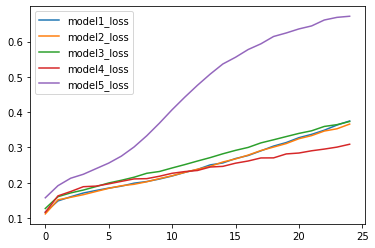

In [175]:
plt.plot(loss1['accuracy'],label = 'model1_loss')
plt.plot(loss2['accuracy'],label = 'model2_loss')
plt.plot(loss3['accuracy'],label = 'model3_loss')
plt.plot(loss4['accuracy'],label = 'model4_loss')
plt.plot(loss5['accuracy'],label = 'model5_loss')
plt.legend()
plt.show()

In [177]:
model.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
model2.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
model3.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
model4.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
model5.fit(x_train,y_train,epochs = 10,class_weight = class_weight_dict)

model6 = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              ),
    Bidirectional(LSTM(units = 100, return_sequences = True)),    #when it is true, it returns value at every time stamps
    Bidirectional(LSTM(units = 100, return_sequences = True)),
    Bidirectional(LSTM(units = 50)),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
    Dense(64, activation="relu"),
    model4.add(Dropout(0.5)),
    Dense(20,activation = 'softmax')
])


model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model6.fit(x_train,y_train,epochs = 10,class_weight = class_weight_dict)

Epoch 1/20
1750/1750 [==============================] - 160s 91ms/step - loss: 1.5158 - accuracy: 0.3869
Epoch 2/20
1750/1750 [==============================] - 150s 86ms/step - loss: 1.4792 - accuracy: 0.3925
Epoch 3/20
1750/1750 [==============================] - 143s 82ms/step - loss: 1.4271 - accuracy: 0.4037
Epoch 4/20
1750/1750 [==============================] - 155s 89ms/step - loss: 1.3816 - accuracy: 0.4164
Epoch 5/20
1750/1750 [==============================] - 152s 87ms/step - loss: 1.3562 - accuracy: 0.4220
Epoch 6/20
1750/1750 [==============================] - 153s 87ms/step - loss: 1.3115 - accuracy: 0.4322
Epoch 7/20
1750/1750 [==============================] - 144s 82ms/step - loss: 1.2725 - accuracy: 0.4417
Epoch 8/20
1750/1750 [==============================] - 143s 82ms/step - loss: 1.2379 - accuracy: 0.4498
Epoch 9/20
1750/1750 [==============================] - 146s 83ms/step - loss: 1.1996 - accuracy: 0.4588
Epoch 10/20
1750/1750 [==============================] 

1750/1750 [==============================] - 256s 146ms/step - loss: 1.4014 - accuracy: 0.3820
Epoch 19/20
1750/1750 [==============================] - 263s 150ms/step - loss: 1.3778 - accuracy: 0.3864
Epoch 20/20
1750/1750 [==============================] - 263s 150ms/step - loss: 1.3473 - accuracy: 0.3957
Epoch 1/10
1750/1750 [==============================] - 375s 214ms/step - loss: 0.4774 - accuracy: 0.6916
Epoch 2/10
1750/1750 [==============================] - 378s 216ms/step - loss: 0.4810 - accuracy: 0.6925
Epoch 3/10
1750/1750 [==============================] - 507s 290ms/step - loss: 0.4501 - accuracy: 0.7051
Epoch 4/10
1750/1750 [==============================] - 640s 366ms/step - loss: 0.4540 - accuracy: 0.7058
Epoch 5/10
1750/1750 [==============================] - 652s 373ms/step - loss: 0.4167 - accuracy: 0.7196
Epoch 6/10
1750/1750 [==============================] - 656s 375ms/step - loss: 0.4175 - accuracy: 0.7212
Epoch 7/10
1750/1750 [==============================] -

TypeError: The added layer must be an instance of class Layer. Received: layer=None of type <class 'NoneType'>.

In [174]:
all_losses.columns = ['model1_loss', 'model2_loss', 'model3_loss', 'model4_loss', 'model5_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
for column in all_losses.columns:
    plt.plot(all_losses.index, all_losses[column], label=column)

plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'all_losses' is not defined

In [75]:
loss = pd.DataFrame(model5.history.history)
loss

,loss,accuracy
0,2.733196,0.148571
1,2.592027,0.188107
2,2.517860,0.204875
3,2.446356,0.220411
4,2.364467,0.234661
5,2.263547,0.254071
6,2.138028,0.271107
7,1.992969,0.297982
8,1.831022,0.327839
9,1.656220,0.362804


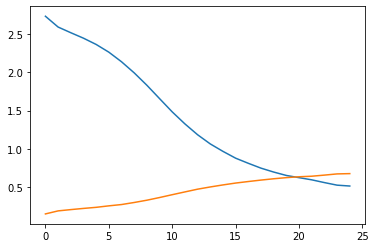

In [76]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [80]:
# few more epochs wont hurt
model5.fit(x_train,y_train,epochs = 5,class_weight = class_weight_dict)

Epoch 1/5
1750/1750 [==============================] - 202s 115ms/step - loss: 0.4298 - accuracy: 0.7189
Epoch 2/5
1750/1750 [==============================] - 204s 117ms/step - loss: 0.3973 - accuracy: 0.7328
Epoch 3/5
1750/1750 [==============================] - 204s 117ms/step - loss: 0.3839 - accuracy: 0.7400
Epoch 4/5
1750/1750 [==============================] - 212s 121ms/step - loss: 0.3799 - accuracy: 0.7435
Epoch 5/5
1750/1750 [==============================] - 215s 123ms/step - loss: 0.3841 - accuracy: 0.7428


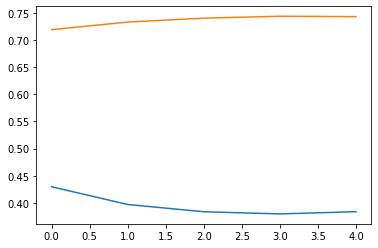

In [83]:
import matplotlib.pyplot as plt
loss = pd.DataFrame(model5.history.history)
plt.plot(loss)

In [84]:
# saturating , so 74% is the accuracy score

## Model Evaluation

In [85]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 19s 33ms/step - loss: 2.9909 - accuracy: 0.1853


[2.99088191986084, 0.18528571724891663]

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(x_test)

438/438 [==============================] - 8s 18ms/step


In [90]:
y_test = np.argmax(y_test)

In [91]:
y_test

9

In [ ]:

print(classification_report(y_test, predictions))

In [ ]:
# bas ab pickle file banani hai aur preprocessing pipeline banani hai

In [ ]:
import tensorflow as tf
gpu_devices = tf.config.list_physical_devices()

In [ ]:
gpu_devices

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
model.save('emoji_model5.h5')

In [178]:
necessary = [".", ",", "!", "?"]
def r_unnecessary1(line):
    nline = ""
    line = line.split()
#     line = ['sejbsgr','sejgbsr','akbrgogir']
#     words = 'sejbsgr'
    for words in line:
        c = 0
        if(words[0] in necessary):
            c = 1
        elif(words[(len(words)-1)] in necessary):
            c = 2
        if(c == 1):
            nline += words[0] + " " + words[1:len(words)] + " "
        if(c == 2):
            nline += words[0:(len(words) - 1)] + " " + words[(len(words) - 1)] + " "
        if(c == 0):
            nline += words + " "
    return nline

necessary = [".", ",", "!", "?"]
def r_unnecessary2(line):
    nline = ""
    line = line.split()
    for words in line:
        if((words.isalpha() == False) and (words in necessary)):
            nline += words + " "
        elif((words.isalpha() == False) and (words not in necessary)):
            continue
        else:
            words = words.lower()
            nline += words + " "
    return nline


# padding the sequence
from tensorflow.keras.utils import pad_sequences
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
def final_p(X):  
    x_tokens = tokenizer.texts_to_sequences([X])
    padded = pad_sequences(
        x_tokens,
        maxlen=31,
        padding='post',
        truncating='pre',
        value=0.0
    )
    return padded

# Load the model
from tensorflow.keras.models import load_model

model = load_model('emoji_model5.h5')


In [184]:
text = "i am in hate with a sexy and hot girl"
t1 = r_unnecessary1(text)
t2 = r_unnecessary2(t1)
t3 = final_p(t2)

In [185]:
t3

array([[   5,  163,    7,  732,   11,    4, 1246,    6,  232,  103,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [186]:
prediction = model5.predict(t3)

1/1 [==============================] - 0s 44ms/step


In [187]:
prediction.shape

(1, 20)

In [188]:
prediction[0]

array([1.6361411e-09, 9.9994224e-03, 3.2283574e-01, 2.9104635e-02,
       1.6244606e-03, 2.0909134e-12, 1.9425590e-08, 2.8251933e-02,
       9.3008213e-02, 4.8664084e-01, 4.3091865e-07, 1.7776379e-07,
       1.5069213e-03, 4.1443931e-05, 2.6466696e-02, 2.3738543e-05,
       1.1084419e-09, 3.9728459e-07, 3.9504350e-05, 4.5533341e-04],
      dtype=float32)

In [189]:
np.argmax(prediction)

9

In [ ]:
[t2]

In [ ]:
x_tokens = tokenizer.texts_to_sequences([t2])
x_tokens

In [ ]:
x_tokens

In [ ]:
padded = pad_sequences(
        x_tokens,
        maxlen=31,
        padding='post',
        truncating='pre'
    )

In [ ]:
padded

In [ ]:
x_tokens = list(x_tokens)

In [ ]:
padded = pad_sequences(
        x_tokens,
        maxlen=31,
        padding='post',
        truncating='pre',
        value=0.0
    )

In [ ]:
arr_2d = np.array(x_tokens)

# Convert to 1D array using flatten()
x_tokens = arr_2d.flatten()


In [ ]:
t3

In [81]:
import sys
sys.path

['C:\\Users\\Chinmay\\Desktop\\deass and amel\\Sentiment analysis\\emoji_prediction',
 'C:\\Users\\Chinmay\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\Chinmay\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\Chinmay\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\Chinmay\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\Chinmay\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'C:\\Users\\Chinmay\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32',
 'C:\\Users\\Chinmay\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\Chinmay\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin',
 'C:\\Users\\Chinmay\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages']